<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [2]:
# Importing numpy library
import numpy as np
# Setting random seed to 0
np.random.seed(0)

This setting of the random seed ensures that any randomly generated variables in the rest of the code are the same each time i.e. repeatable. This should be done for all tutorials unless otherwise specified

In [3]:
# Importing sklearn library and datasets from that library
import sklearn
from sklearn import datasets
# Creating a dummy dataset
X, y = sklearn.datasets.make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0)

This has created a dataset of 100 samples and 2 features, so each sample has two pieces of information associated with it. By setting the number of informative features to 2 and redundant to 0 we are saying that every piece of information each sample comes with has an impact on the output.

In [4]:
# Manipulating the inputs of the dataset to conform to the tutorial question
X[:, 0] = np.abs(X[:, 0] * 0.5 + 5)
X[:, 1] = np.abs(X[:, 1] * 30 + 160)

Here we are manipulating the inputs we randomly generated to conform with the tutorial question, the first column is crack defect length in mm and the second column is brightness of the crack.

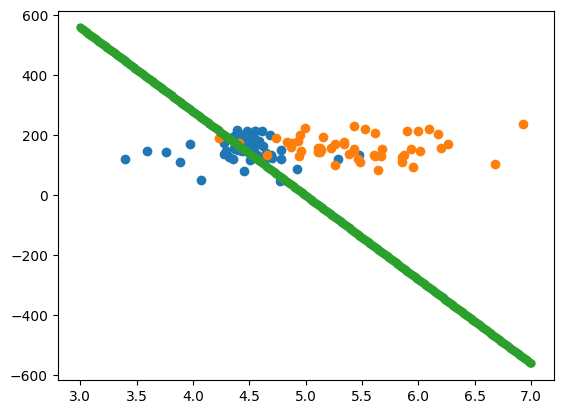

In [13]:
# Importing the plotting library
import matplotlib.pyplot as plt
# Plotting the two separate classes of inputs on the same axis, x axis is first column of input
# (crack length) and the y axis is the second column (Crack brightness)
fig , ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

# Creating an x1 array
x1 = np.linspace(3, 7, 500)
# Creating the function defined in the tutorial question
x2 = -280 * x1 + 1400

# plotting the y = -280x + 1400 curve
ax.scatter(x1, x2, linewidths = 0.01)

Here we have potted the inputs, the two class being separated into two different colours as well as a separation line defined in the sheet.

Question 2

In [26]:
# Creating a function to generate an arbitrary covariance matrix with a rotation
def get_cov(sdx = 1, sdy = 1, rotangdeg = 0):
  # Adding the standard deviation squared values to the covariance matrix
  covar = np.array([[sdx**2, 0], [0, sdy**2]])
  # Converting the units of the rotation angle
  rot_ang = (rotangdeg / 360) * 2 * np.pi
  # Writing the rotation matrix
  rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

  # rotating the covar values
  covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
  return covar

Here we have defined a function to generate an arbitrary covariance matrix with a rotation

In [20]:
# Defining x and y points
x1line = np.linspace(-1, 1, 200)
x2line = np.linspace(-1, 1, 200)

# Creating a grid of points
x1grid, x2grid = np.meshgrid(x1line, x2line)
# Combining these 2
Xgrid = np.array([x1grid, x2grid]).reshape([2, 40000]).T

Here we have created a grid of 40000 points

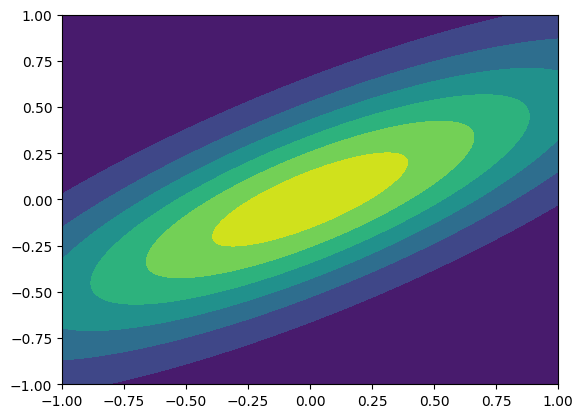

In [33]:
# Creating a covariance matrix with a standard deviation of 1 in x 0.3 in y and 30 degree rotation
covar = get_cov(sdx = 1, sdy = 0.3, rotangdeg = 30)
# Getting the probability density function in 2D
p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar))) * np.exp(-1 / 2 * (np.matmul(Xgrid, np.linalg.inv(covar)) * Xgrid).sum(-1))
preshaped = np.reshape(p, (200, 200))

# plotting
plt.contourf(x1line, x2line, preshaped)

Here we have plotted the distribution of points for the covariance matrix defined in the question

(-1.0, 1.0)

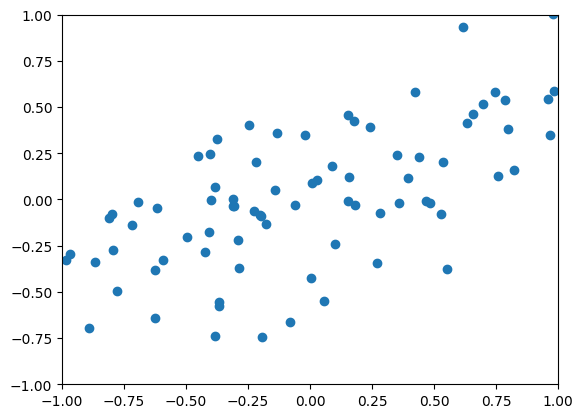

In [38]:
# Getting random points from the distribution
random = np.random.multivariate_normal((0,0), covar, size = 100)
# plotting
fig , ax = plt.subplots()
ax.scatter(random[:, 0], random[:, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

Here we have plot 100 randomly generated points from the distribution. We can compare to the contour plot and see that the points roughly follow the same relatoinship as our contour plot although I was expecting to see a greater concentration centrally.

Question 3